# Simple Kmeans example with scikit-learn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
X = np.array([[5,3],
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])

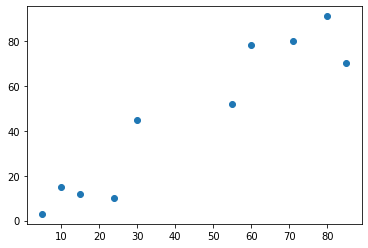

In [3]:
plt.scatter(X[:,0],X[:,1])

In [4]:
##Fitting the kMeans algorithm with k=2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[70.2 74.2]
 [16.8 17. ]]
[1 1 1 1 1 0 0 0 0 0]


In [5]:
#Building a function that will color the datapoints in X according to where they were clustered by kmeans,
#and plot the centroids.
def plot_kmeans(X, kmeans, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:,0], centers[:,1], c=np.arange(centers.shape[0]),
               marker='x', s=100, cmap='rainbow')

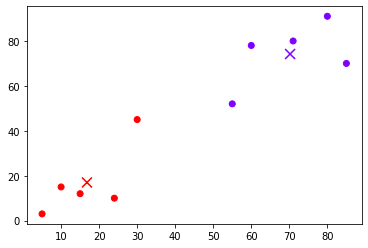

In [6]:
plot_kmeans(X, kmeans)

In [7]:
##Now let's change kmeans to use k=5 clusters instead of k=2 
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[82.5 80.5]
 [13.5 10. ]
 [65.5 79. ]
 [30.  45. ]
 [55.  52. ]]
[1 1 1 1 3 0 2 2 4 0]


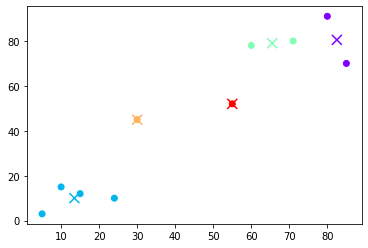

In [8]:
#The result looks overfitted, with two of the clusters only having one datapoint each. Thus we need to be careful
#in our choice of k!
plot_kmeans(X, kmeans)

# Show progression of kmeans algorithm

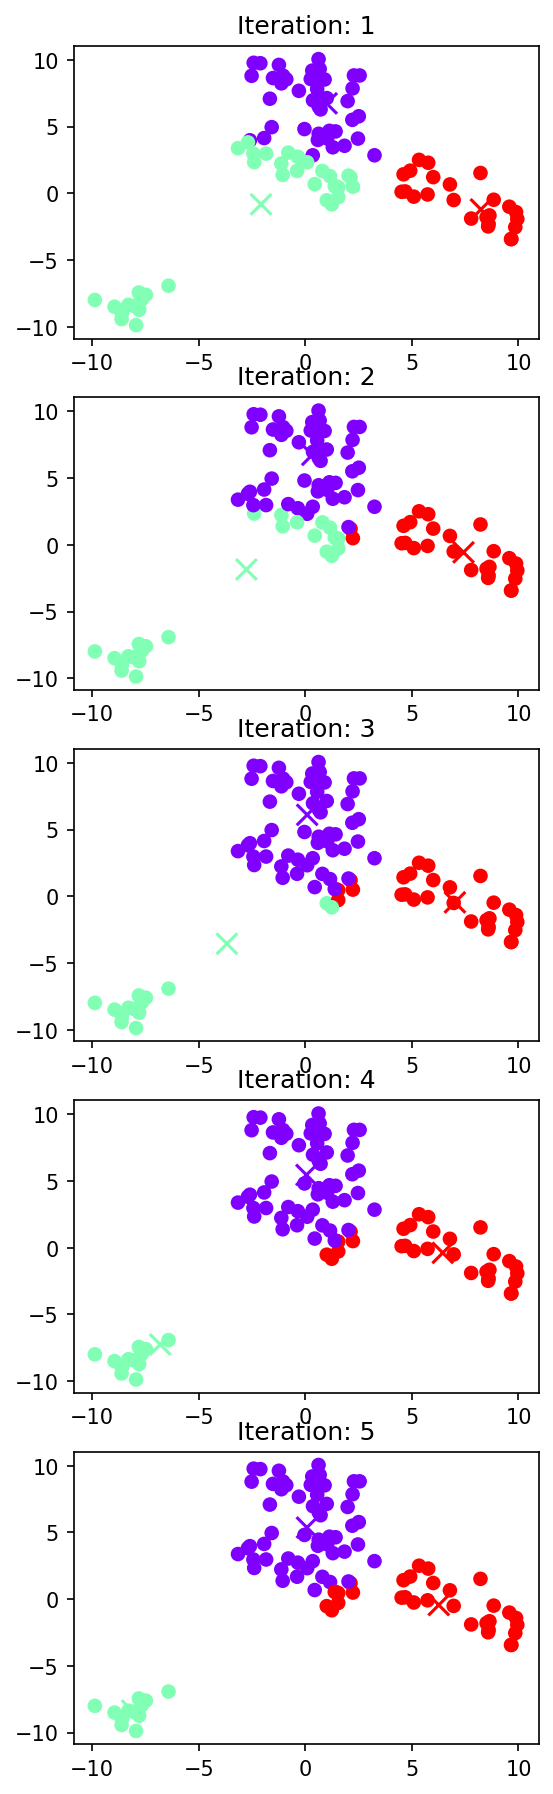

In [9]:
from sklearn.datasets import make_blobs
X2, _ = make_blobs(centers=8, random_state=0)

# Setup plots
show_iters = np.arange(5) + 1
_, axes = plt.subplots(len(show_iters), 1,
                       figsize=(4, 3*len(show_iters)), dpi=150)

# Show plot for each iteration
for max_iter, ax in zip(show_iters, axes):
    kmeans = KMeans(n_clusters=3,  max_iter=max_iter,
                    n_init=1, init='random', random_state=0)
    kmeans.fit(X2)
    plot_kmeans(X2, kmeans, ax=ax)
    ax.set_title(f'Iteration: {max_iter}')

## Examples below taken Python handbook  https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

# Clustering may not converge to optimal solution

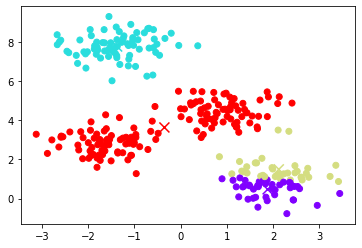

In [10]:
X2, _ = make_blobs(n_samples=300, centers=4,
                         cluster_std=0.60, random_state=0)
kmeans = KMeans(n_clusters=4, init='random',
                n_init=1, random_state=104) # 104 gives bad seeding
kmeans.fit(X2)
plot_kmeans(X2, kmeans)

# Choosing the number of clusters is not obvious 

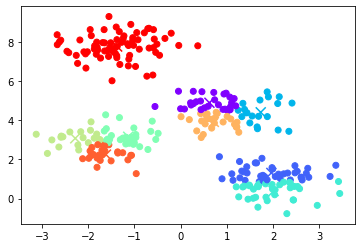

In [11]:
# Example from Python handbook
X2, _ = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=9, init='random', n_init=1, random_state=0)
kmeans.fit(X2)
plot_kmeans(X2, kmeans)

# Axis scaling matters for k-means (one motivation for GMMs)

(-7.679357622326382, 38.85413904249712, -1.2688240342438202, 5.881284905565782)

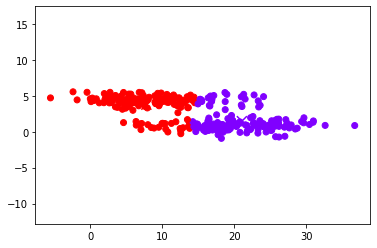

In [12]:
X3, y_true = make_blobs(n_samples=300, centers=2,
                        cluster_std=0.60, random_state=0)
X3[:, 0] = X3[:, 0]*10

kmeans = KMeans(n_clusters=2, random_state=0).fit(X3)

plot_kmeans(X3, kmeans)
plt.axis('equal')

In [10]:
np.arange(kmeans.cluster_centers_.shape[0])

array([0, 1, 2, 3, 4])